# 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [41]:
#converting into dataframe
df = pd.read_csv('advertising.csv')

In [42]:
df.shape

(200, 5)

In [43]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [44]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Imputing Missing Values with Medians

In [12]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [13]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [14]:
df=df.drop(['Unnamed: 0'],axis=1)

In [15]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# 3. Exploratory Data Analysis Data Visualization

## A.Univariate analysis

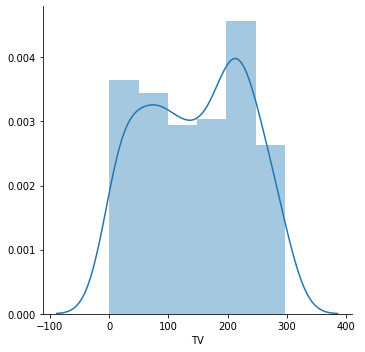

In [17]:
import seaborn as sb
sb.FacetGrid(df,height=5)\
    .map(sb.distplot,'TV')\
    .add_legend();
plt.show()

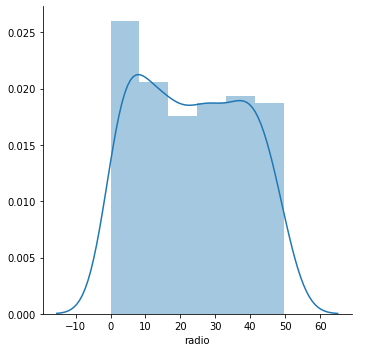

In [18]:
import seaborn as sb
sb.FacetGrid(df,height=5)\
    .map(sb.distplot,'radio')\
    .add_legend();
plt.show()

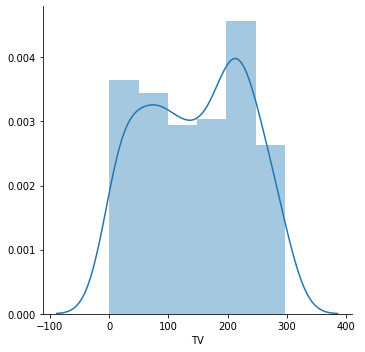

In [19]:
import seaborn as sb
sb.FacetGrid(df,height=5)\
    .map(sb.distplot,'TV')\
    .add_legend();
plt.show()

In [20]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


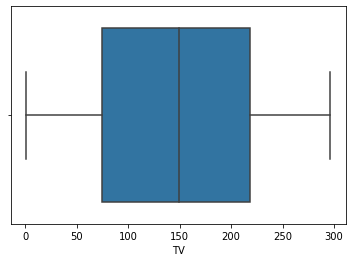

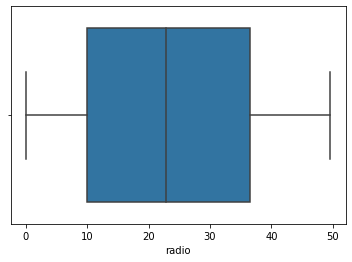

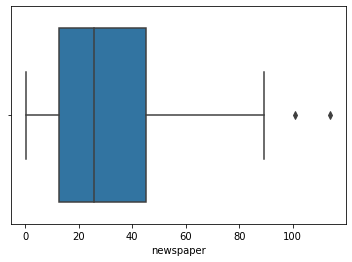

In [26]:
sb.boxplot(x='TV',data=df)
plt.show()
sb.boxplot(x='radio',data=df)
plt.show()
sb.boxplot(x='newspaper',data=df)
plt.show()

In [28]:
for i in range(95,101):
    print(i,np.round(np.percentile(df['newspaper'],i),3))

95 71.825
96 73.432
97 75.018
98 79.312
99 89.515
100 114.0


Summary:<br>
1.Most of the money is spend in TV channel advertising with mean of 147 dollars  followed  by newspaper 30dollars <br>
2.Distributions are also normal and there are only few outliers in newspaper feature.

## B.Bivariate analysis

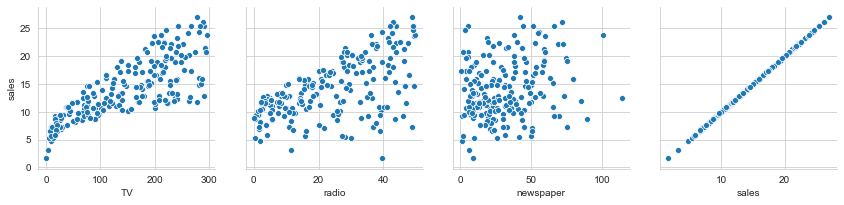

In [32]:


sns.set_style("whitegrid");               #Step1:Set the gird to white.
sns.pairplot(df,x_vars=df.columns,y_vars='sales' ,height=3); #.pairplot(dataset,hue='',size=n) function to plot pairplot
plt.show()

Summary:<br>
1.We can clearly  see that as advertising cost for tv increases there is increase in sales also .<br>
2.Sales also have some linear relationship with radio ,but newspaper don't have any relatioship with sales.

# 4. Data pre-processing and cleaning

## Removing outliers

In [45]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [46]:
df.shape

(198, 5)

In [47]:
for i in range(95,101):
    print(i,np.round(np.percentile(df['newspaper'],i),3))

95 69.215
96 71.86
97 73.472
98 75.036
99 79.368
100 89.4



As we can see the 100th percentile value is now in range.

## Train_Test Split

In [48]:
y=df['sales']
x=df.drop(['sales'],axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 5. Building Models

# Model1 : KNN

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,50,2)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
clf.best_params_

{'n_neighbors': 3}

In [87]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)

y_test_pred = neigh.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.8051998724385147


# Model 2 : Logistic Regression 

# Model 3 : Linear regression 

In [56]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_test_pred = Lr.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.8960139894468448


# Model 4 : SVM

In [57]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.9956059556752462


In [58]:
model.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [59]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVR(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[-0.06588164043483764, -0.026074685399767504, 0.6736331576461201, 0.9710145772089124, 0.9507741660733073]


In [60]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

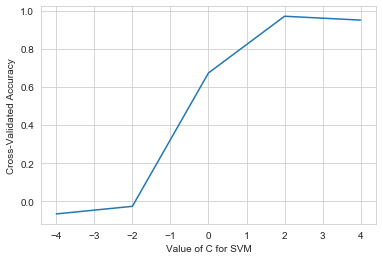

In [61]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [62]:
from sklearn.svm import SVR

clf = SVR(C=100,gamma=0.0001,kernel= 'rbf')

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9822357846845042


# Model 5 : Decision Tree

In [63]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
1.0


In [64]:
model.best_params_

{'max_depth': 100}

In [70]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=5)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.26194891080511695, 0.8986216969136105, 0.9266421714252285, 0.9198885412675445, 0.9225243813681308]


Text(0, 0.5, 'Cross-Validated Accuracy')

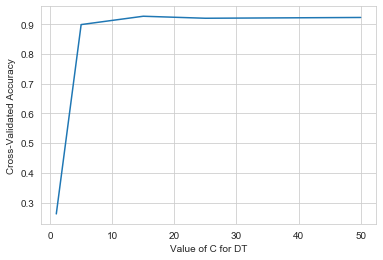

In [71]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

# Traning with best hyperparameters

In [69]:
clf = DecisionTreeRegressor(criterion='mse',max_depth=100,min_samples_split=5)

clf.fit(X_train, y_train)


y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9560094056238784


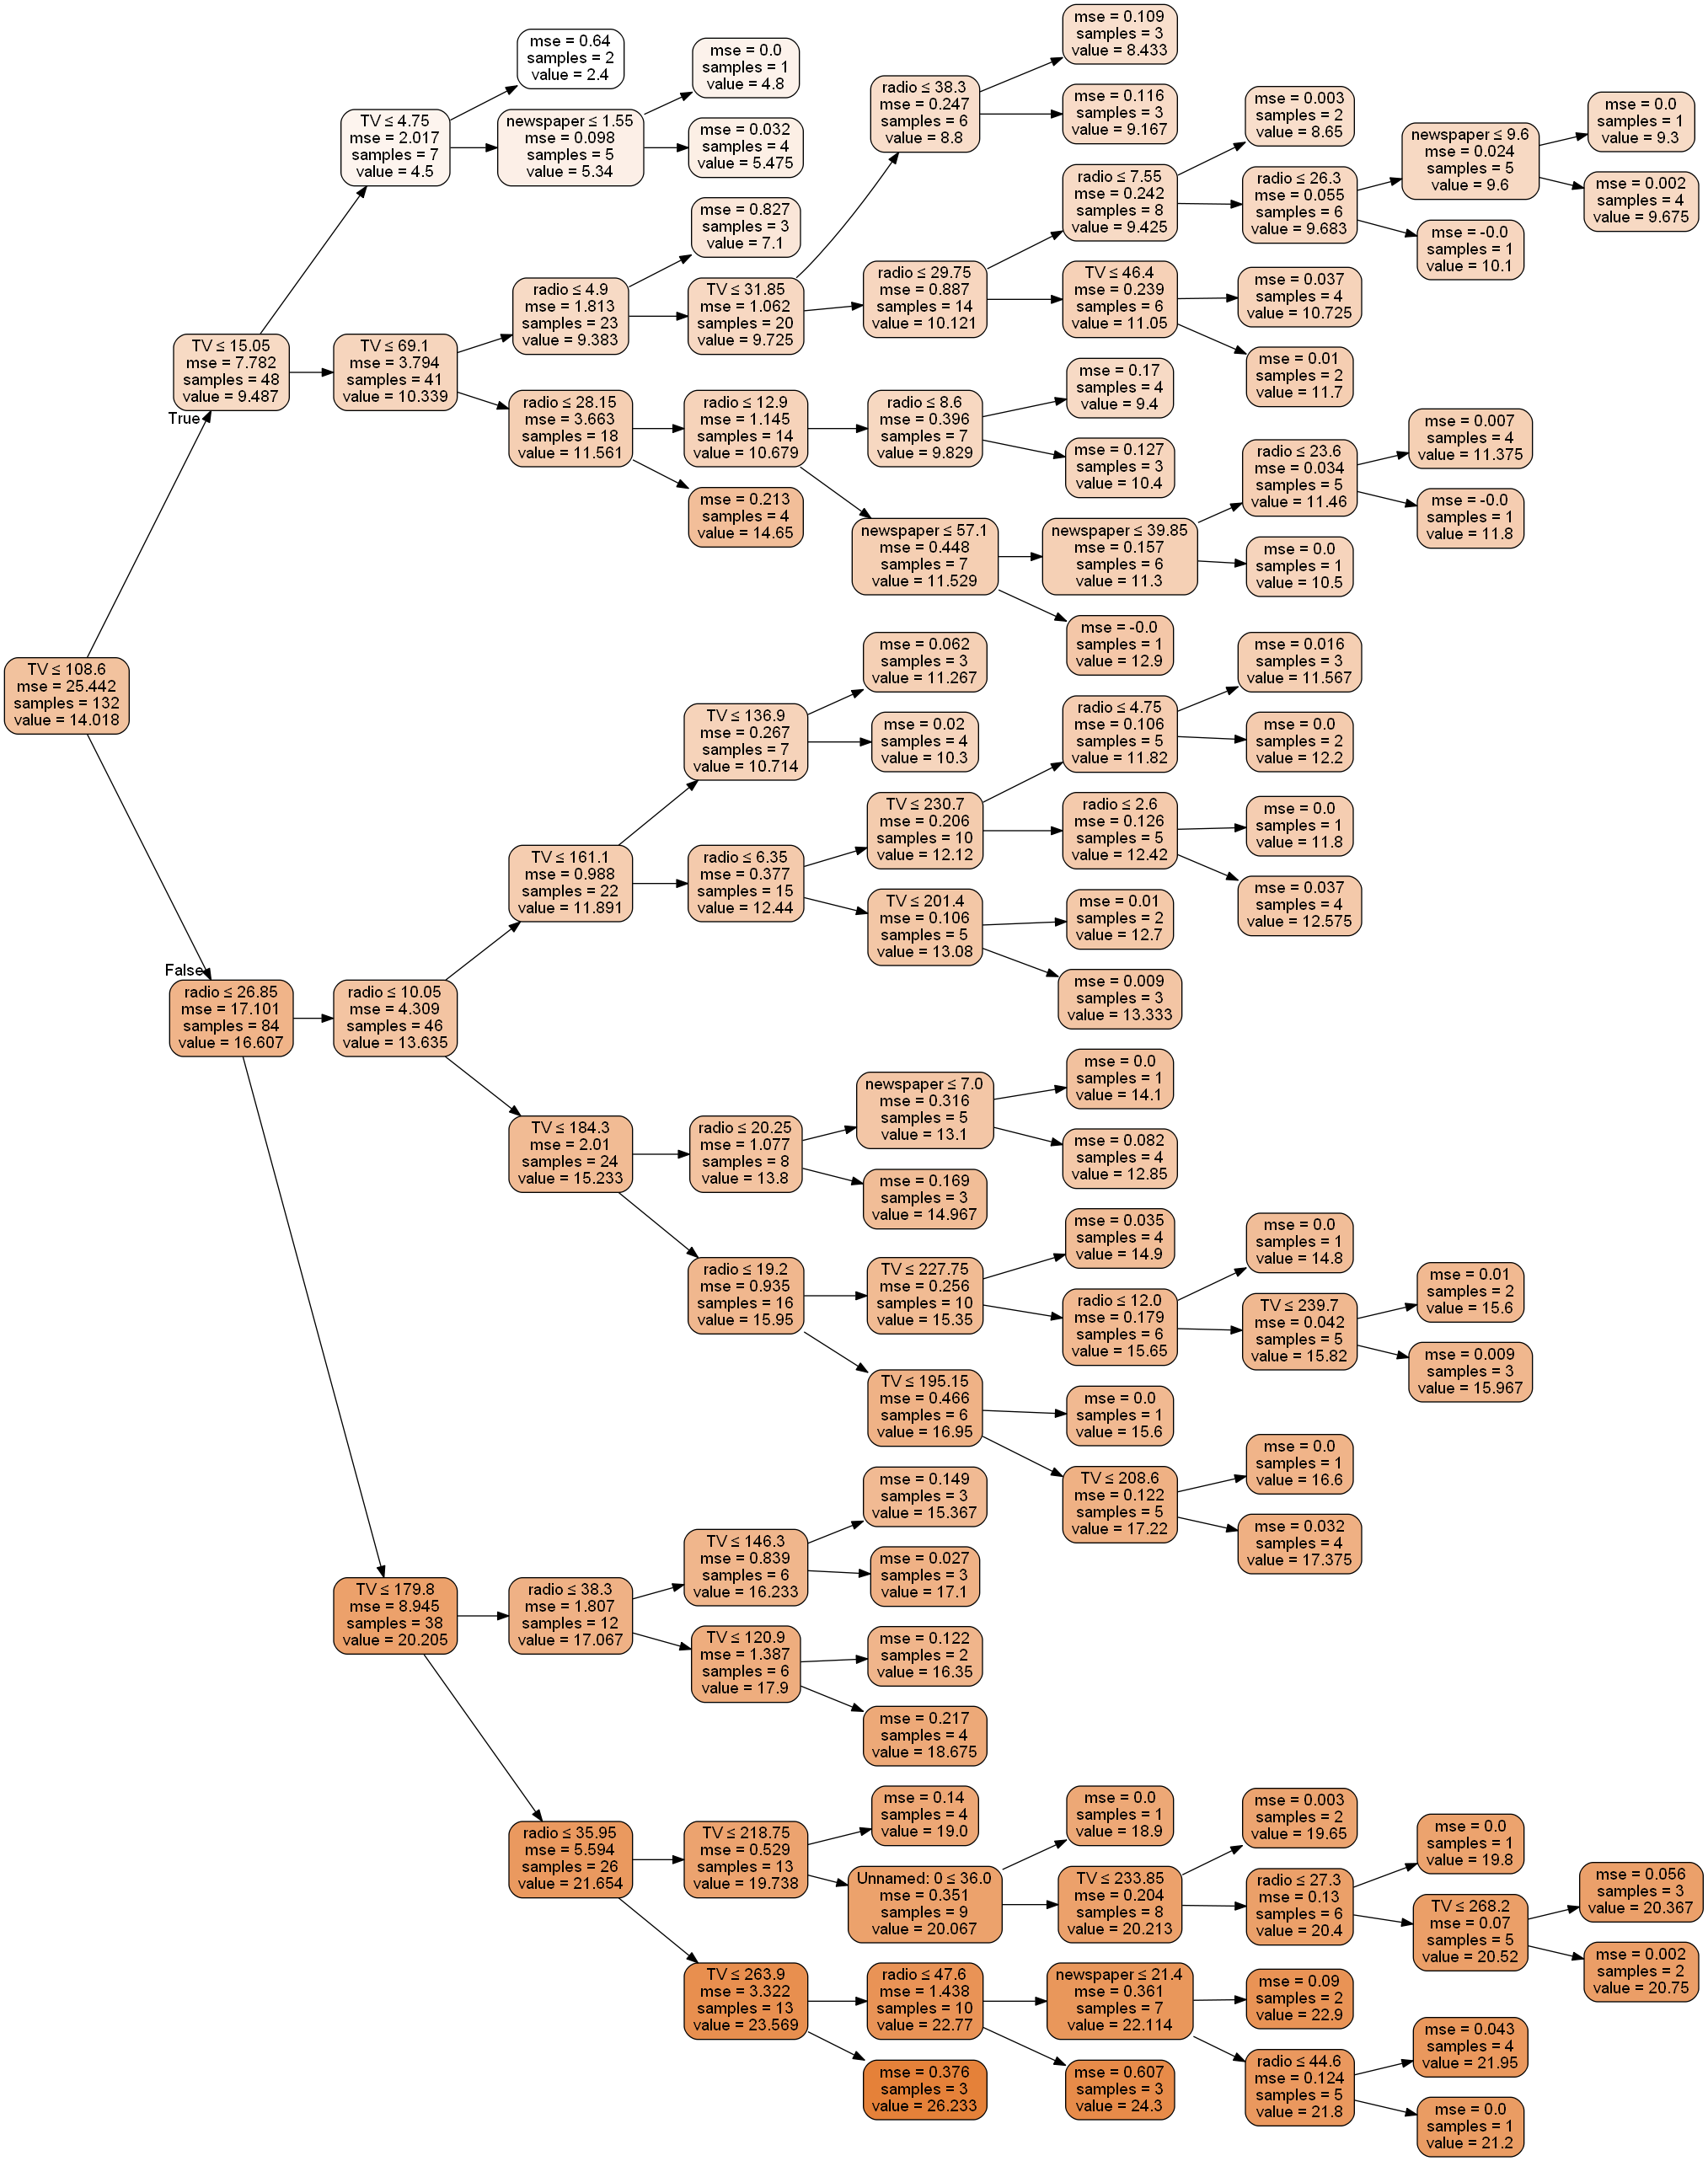

In [72]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [73]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.99472564684354


In [74]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=100,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_test_pred = RF.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9819089368075903


# Boosting

In [75]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.9800315547104778


In [76]:
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=5,n_estimators=100)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9804317537148279


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [77]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_test_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_test_pred))



[15:39:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9815170992161822


# 6.Model Comparison

In [91]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.8051' ])
table.add_row(["Linear Regression" ,'0.8960' ])
table.add_row(["SVM", '0.9822' ])
table.add_row(["Decision Tree",'0.9560' ])
table.add_row(["RandomForest",'0.9819' ])
table.add_row(["GBDT" ,'0.9804' ])
table.add_row(["Xgboost",'0.998' ])
print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.8051  |
| Linear Regression |  0.8960  |
|        SVM        |  0.9822  |
|   Decision Tree   |  0.9560  |
|    RandomForest   |  0.9819  |
|        GBDT       |  0.9804  |
|      Xgboost      |  0.998   |
+-------------------+----------+


Summary:<br>
SVR performs very well as the relation between most features is linear enough and SVM is more predictable than Ensmembles.

# 7.Creating Submission File

In [93]:
best_model=SVR
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']